# Wildfire in Australia

---


# Objectives

After completing this lab you will be able to:

 - Use visualization libraries such as Matplotlib, Pandas, Seaborn and Folium to create informative plots and charts 


---


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

---


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df=pd.read_csv(url)

Let's look at some samples rows from the dataset we loaded:


In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


---


Let's verify the column names and the data type of each variable


In [4]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [6]:
import datetime as dt

In [7]:
df["year"]=pd.to_datetime(df["Date"]).dt.year
df["month"]=pd.to_datetime(df["Date"]).dt.month
df

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,year,month
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N,2020,10
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N,2020,10
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,2020,10
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,2020,10


In [8]:
#verify the columns again
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
year                                     int32
month                                    int32
dtype: object

---


### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>


In [9]:
fire_area=df.groupby(["year"],as_index=False)["Estimated_fire_area"].mean()
fire_area

,year,Estimated_fire_area
0,2005,92.770501
1,2006,176.289434
2,2007,153.112464
3,2008,99.758968
4,2009,141.624955
5,2010,62.429968
6,2011,266.936175
7,2012,265.526196
8,2013,95.896092
9,2014,144.007348


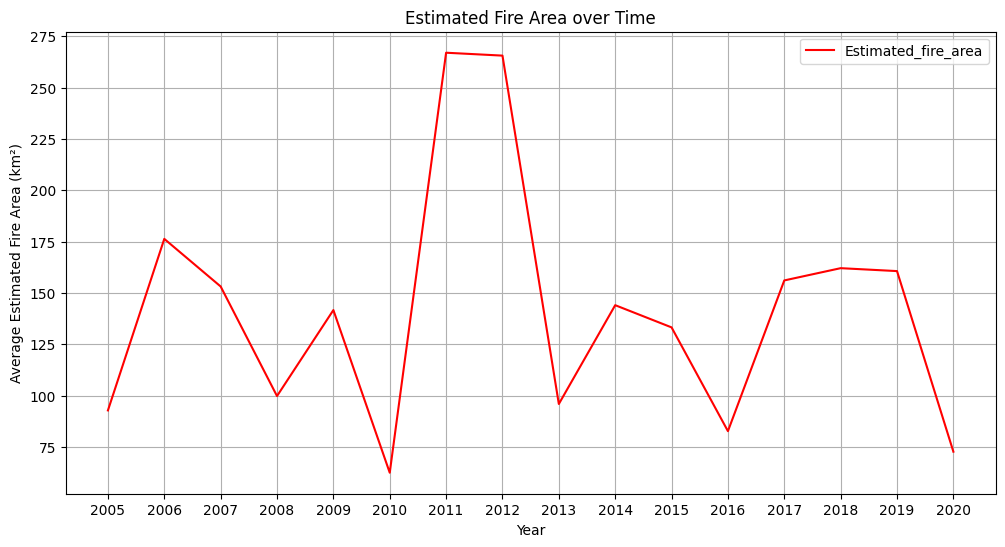

In [10]:
years=[year for year,fire_area in df.groupby("year")]
fire_area.plot(x="year",y="Estimated_fire_area",figsize=(12,6),color="r")
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.xticks(years)
plt.title('Estimated Fire Area over Time')
plt.grid()
plt.show()

---


### TASK 1.2: There is a peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


In [11]:
fire_area_month=df.groupby(["year","month"])["Estimated_fire_area"].mean()
fire_area_month

year  month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
                  ...    
2020  6         53.951983
      7         74.716558
      8         31.242304
      9         47.557737
      10        69.045950
Name: Estimated_fire_area, Length: 190, dtype: float64

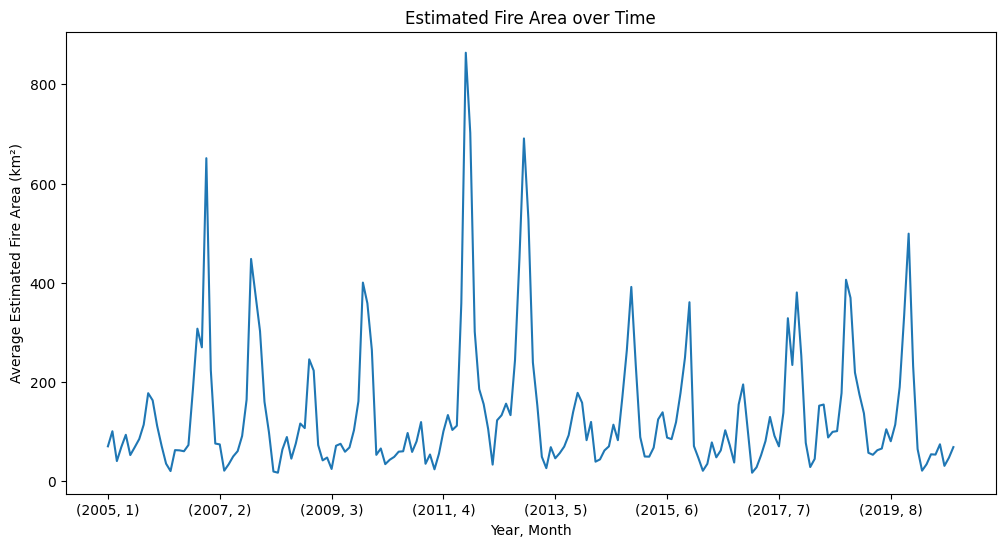

In [55]:
fire_area_month.plot(x=fire_area_month.index, y=fire_area_month.values,figsize=(12,6))
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


---


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br>


In [12]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

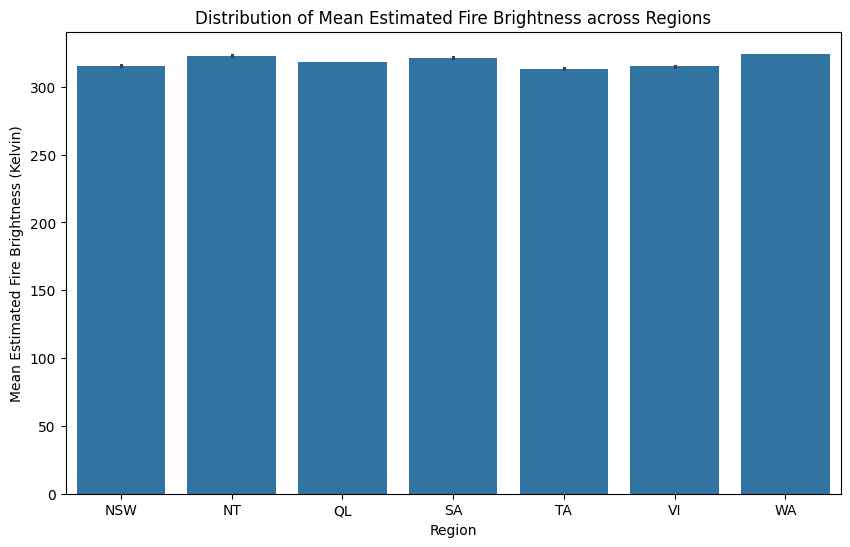

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

---


### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


In [14]:
region_counts=df.groupby(["Region"])["Count"].sum()
region_counts

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

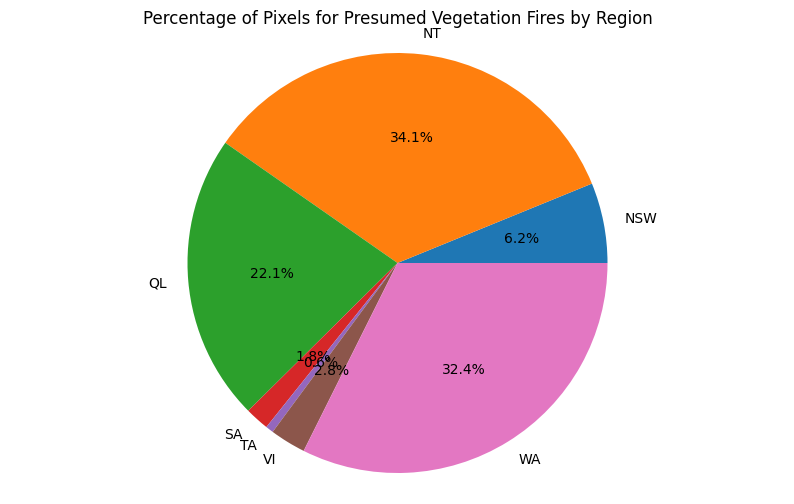

In [15]:
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

### TASK 1.5: Pie is not looking so good as it is overlaped for Region SA, TA, VI 

remove the autopct fromm pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`


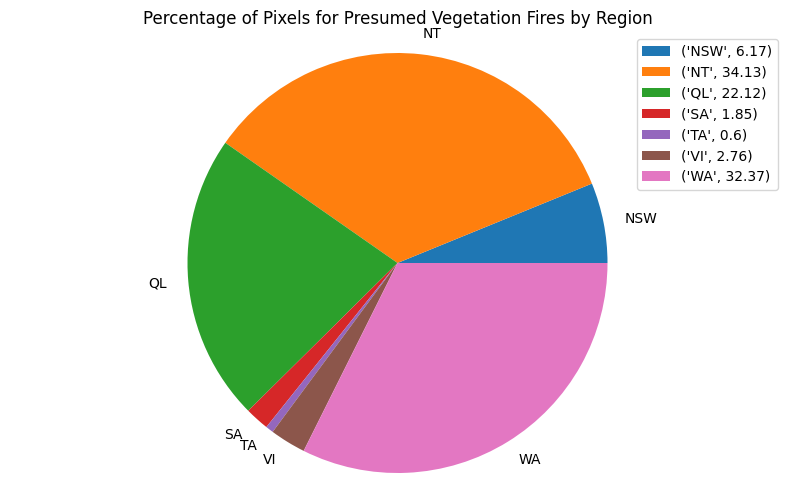

In [16]:
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

---


### TASK 1.6: Histogram of the mean estimated fire brightness<br>


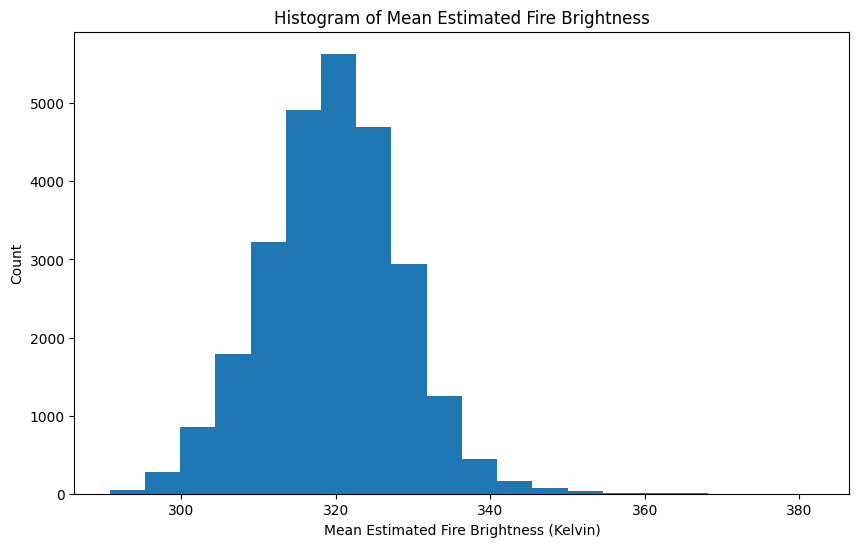

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions?

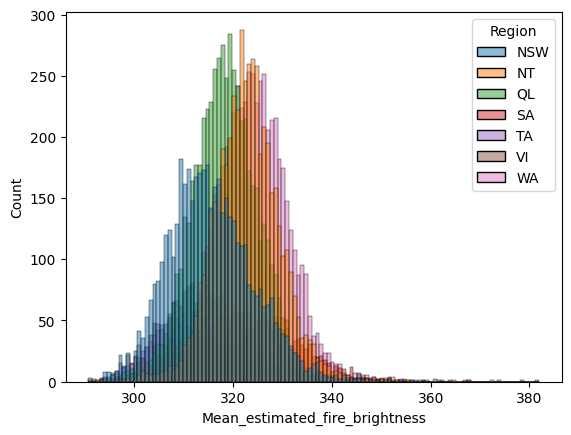

In [18]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

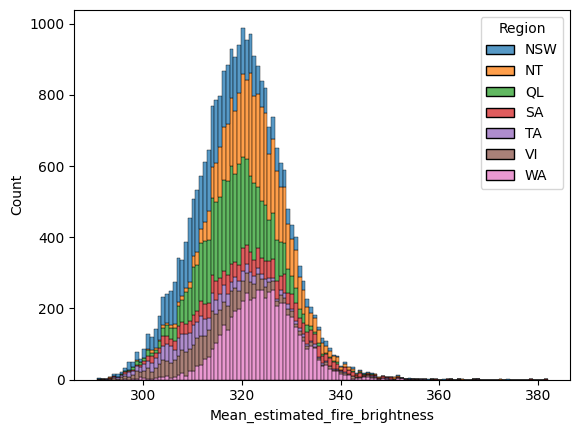

In [19]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

---


### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


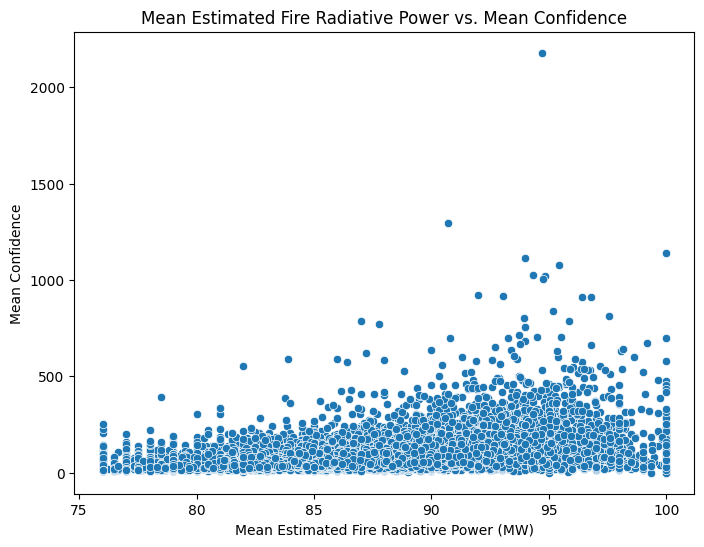

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

---


### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium


In [21]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [23]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)

---


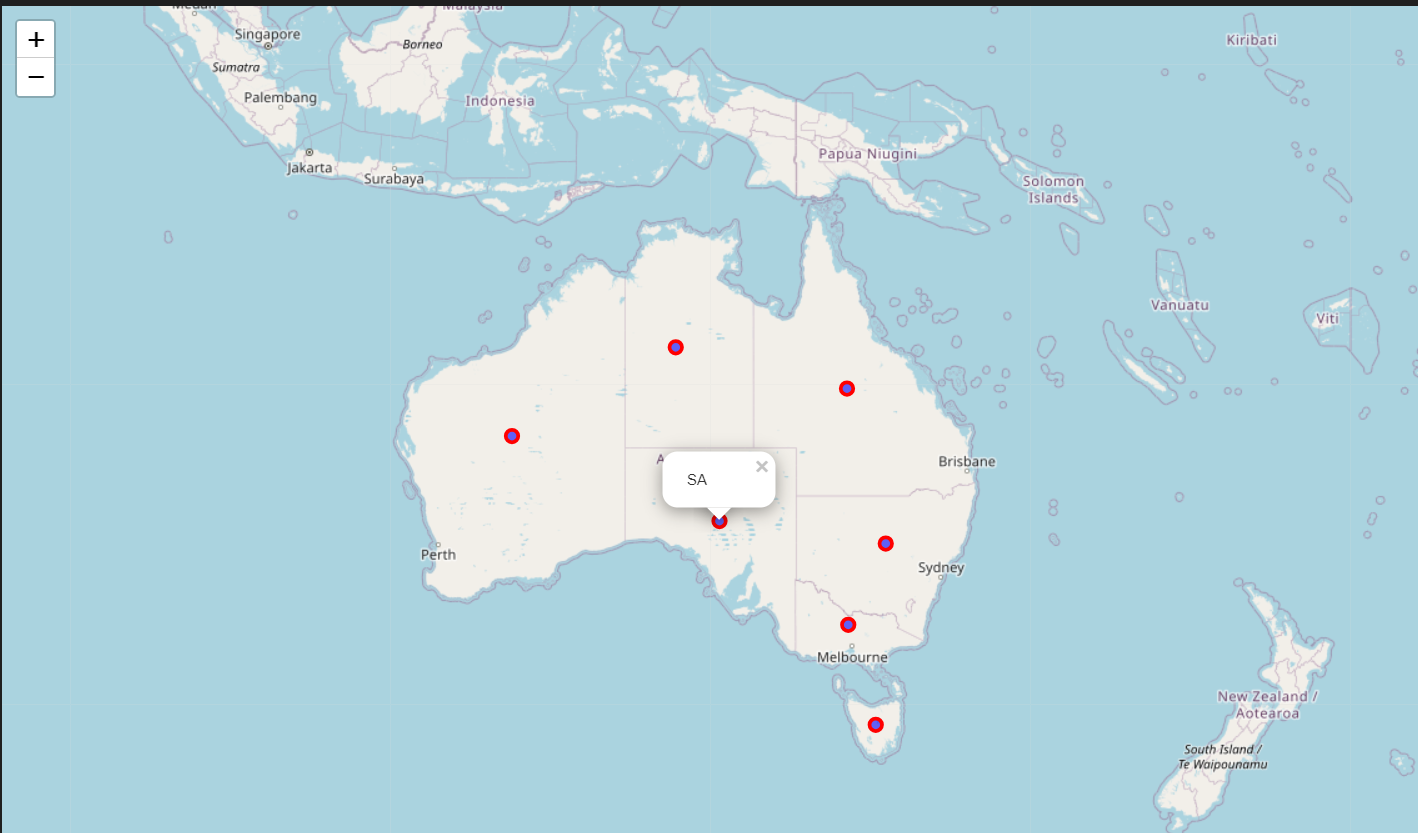